# Step 0: Import packages

In [697]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

# Step 1: Address Problem

TBA

# Step 2: Gathering Data

In [698]:
housing = pd.read_csv('ManhattanHousing.csv',skipinitialspace=True)
# housing2 = pd.read_excel('2009_manhattan_housing.xls')

# Step 3: Preparing Data

### Step 3.1 Correcting Aberrant Values

In [699]:
housing.describe()

,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,18674.0,18674.000000,18674.000000,0.0,18674.000000,18674.000000,18674.000000,18674.000000,18674.000000,1.867400e+04,18674.000000,18674.000000,1.867400e+04
mean,1.0,1086.641373,762.816858,NaN,10022.144586,1.387544,0.487255,1.884652,3696.698244,1.699490e+04,1567.544126,2.513066,1.120539e+06
std,0.0,452.269782,823.063326,NaN,245.729728,12.522575,2.422576,12.854103,11169.167540,4.670005e+04,785.986485,0.898576,1.443688e+07
min,1.0,15.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,1.0,889.000000,37.000000,NaN,10016.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1903.000000,2.000000,1.000000e+02
50%,1.0,1027.000000,1006.000000,NaN,10019.000000,0.000000,0.000000,1.000000,0.000000,6.920000e+02,1940.000000,2.000000,4.100000e+05
75%,1.0,1373.000000,1245.000000,NaN,10025.000000,1.000000,1.000000,1.000000,2000.000000,2.076250e+03,1987.000000,4.000000,9.500270e+05
max,1.0,2250.000000,9110.000000,NaN,10463.000000,764.000000,192.000000,764.000000,204394.000000,1.638637e+06,2010.000000,4.000000,1.760000e+09


- Some of *ZIP CODE* are 0
- Some of *LAND SQUARE FEET* and *GROSS SQUARE FEET* are 0
- Some of *YEAR BUILT* are 0
- Some of *SALE PRICE* are 0

### Step 3.2 Processing NA Values

In [700]:
# fill_blank = ['TAX CLASS AT PRESENT',]
housing.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                 10
BLOCK                                 0
LOT                                   0
EASE-MENT                         18674
BUILDING CLASS AT PRESENT            10
ADDRESS                              11
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

In [701]:
# Drop EASE-MENT since all NA
# Drop BOROUGH since all value is 1
housing.drop(['EASE-MENT','BOROUGH'],axis = 1,inplace = True)

###### Step 3.21 Filling *TAX CLASS AT PRESENT* & *BUILDING CLASS AT PRESENT*

We Assume those missing class has unchange Tax class from the house sold. 

So we fill it with its *TAX CLASS AT TIME OF SALE*.

Similarly, we can fill the missing value of *BUILDING CLASS AT PRESENT* with *BUILDING CLASS AT TIME OF SALE*

In [702]:
housing['TAX CLASS AT PRESENT'].fillna(housing['TAX CLASS AT TIME OF SALE'],inplace = True)
housing['BUILDING CLASS AT PRESENT'].fillna(housing['BUILDING CLASS AT TIME OF SALE'],inplace = True)


###### Step 3.22 Filling ADDRESS

In [703]:
# housing[housing['ADDRESS'].isnull()]

### Step 3.3 Feature preprocessing

###### NEIGHBORHOOD

In [704]:
# right strip each row
housing.NEIGHBORHOOD = housing.NEIGHBORHOOD.str.rstrip()
# Extract main district only
housing.NEIGHBORHOOD = housing.NEIGHBORHOOD.str.extract(r'(?P<Neighbor>[a-zA-Z ]+)')

###### BUILDING CLASS CATEGORY

In [705]:
# right strip each row
housing['BUILDING CLASS CATEGORY'] = housing['BUILDING CLASS CATEGORY'].str.rstrip()

In [706]:
temp = housing['BUILDING CLASS CATEGORY'].str.extract(r'(?P<Class_Num>[0-9]{2})[A|\s]+(?P<CATEGORY>[A-Z0-9 ]+)')
housing['Class_Num'] = temp['Class_Num']
housing['CLASS_CATEGORY'] = temp['CATEGORY']


###### TAX CLASS AT PRESENT & TAX CLASS AT TIME OF SALE


In [707]:
class_lst = []
for x in housing['TAX CLASS AT PRESENT']:
    try:
        class_lst.append(int(x))
    except:
        class_lst.append(int(x[0]))
        
housing['TAX CLASS AT PRESENT'] = class_lst

###### BLOCK


###### LOT


###### BUILDING CLASS AT PRESENT & BUILDING CLASS AT TIME OF SALE


In [708]:
housing['BUILDING CLASS AT PRESENT'] = housing['BUILDING CLASS AT PRESENT'].apply(lambda x: x[0])
housing['BUILDING CLASS AT TIME OF SALE'] = housing['BUILDING CLASS AT TIME OF SALE'].apply(lambda x: x[0])

# Credit:https://www.propertyshark.com/mason/text/nyc_building_class.html
building_class_dict = {}
building_class_dict = dict.fromkeys(['A','B','C','D','R'],'Residential')
building_class_dict.update(dict.fromkeys('S', 'Mixed Use'))
building_class_dict.update(dict.fromkeys(['H','K','L','O'], 'Commercial Buildings'))
building_class_dict.update(dict.fromkeys(['E','F','G','T','U'], 'Industrial Buildings'))
building_class_dict.update(dict.fromkeys('V', 'Vacant Lots'))
building_class_dict.update(dict.fromkeys(['I','J','M','N','P','Q','W'], 'Buildings with Civic Use'))
building_class_dict.update(dict.fromkeys('Y', 'Government Buildings'))
building_class_dict.update(dict.fromkeys('Z', 'Others'))

housing['BUILDING CLASS AT PRESENT'] = housing['BUILDING CLASS AT PRESENT'].map(building_class_dict)
housing['BUILDING CLASS AT TIME OF SALE'] = housing['BUILDING CLASS AT TIME OF SALE'].map(building_class_dict)




######  ADDRESS


######  ZIP CODE


In [709]:
# drop rows if ZIP CODE is 0
housing = housing[housing['ZIP CODE'] != 0]

######  LAND SQUARE FEET & GROSS SQUARE FEET


In [710]:
# most are 0
# housing['GROSS SQUARE FEET'].value_counts()
# housing['LAND SQUARE FEET'].value_counts()

###### YEAR BUILT (??)


In [711]:
# Some of them are missing
def columns_clean(row):
    if row == 0:
        return np.nan
    else:
        return str(row)
housing['YEAR BUILT'] = housing['YEAR BUILT'].apply(columns_clean)


In [719]:
# Fill na with most frequency?
housing['YEAR BUILT'].fillna(housing['YEAR BUILT'].mode()[0],inplace =True)

###### SALE PRICE (??)


In [726]:
# housing['SALE PRICE'].value_counts()


###### SALE DATE


In [733]:
from datetime import datetime

def to_datetime(day):
    try:
        return datetime.strptime(day,'%m/%d/%y')
    except:
        return np.nan
    
housing['SALE DATE'] = housing['SALE DATE'].apply(to_datetime)

In [752]:
days = []
months = []
years = []
for t in housing['SALE DATE']:
    days.append(t.day)
    months.append(t.month)
    years.append(t.year)
    
housing['SALE DATE-day'] = days
housing['SALE DATE-month'] = months
housing['SALE DATE-year'] = years

# Step 4: EDA

<IPython.core.display.Javascript object>


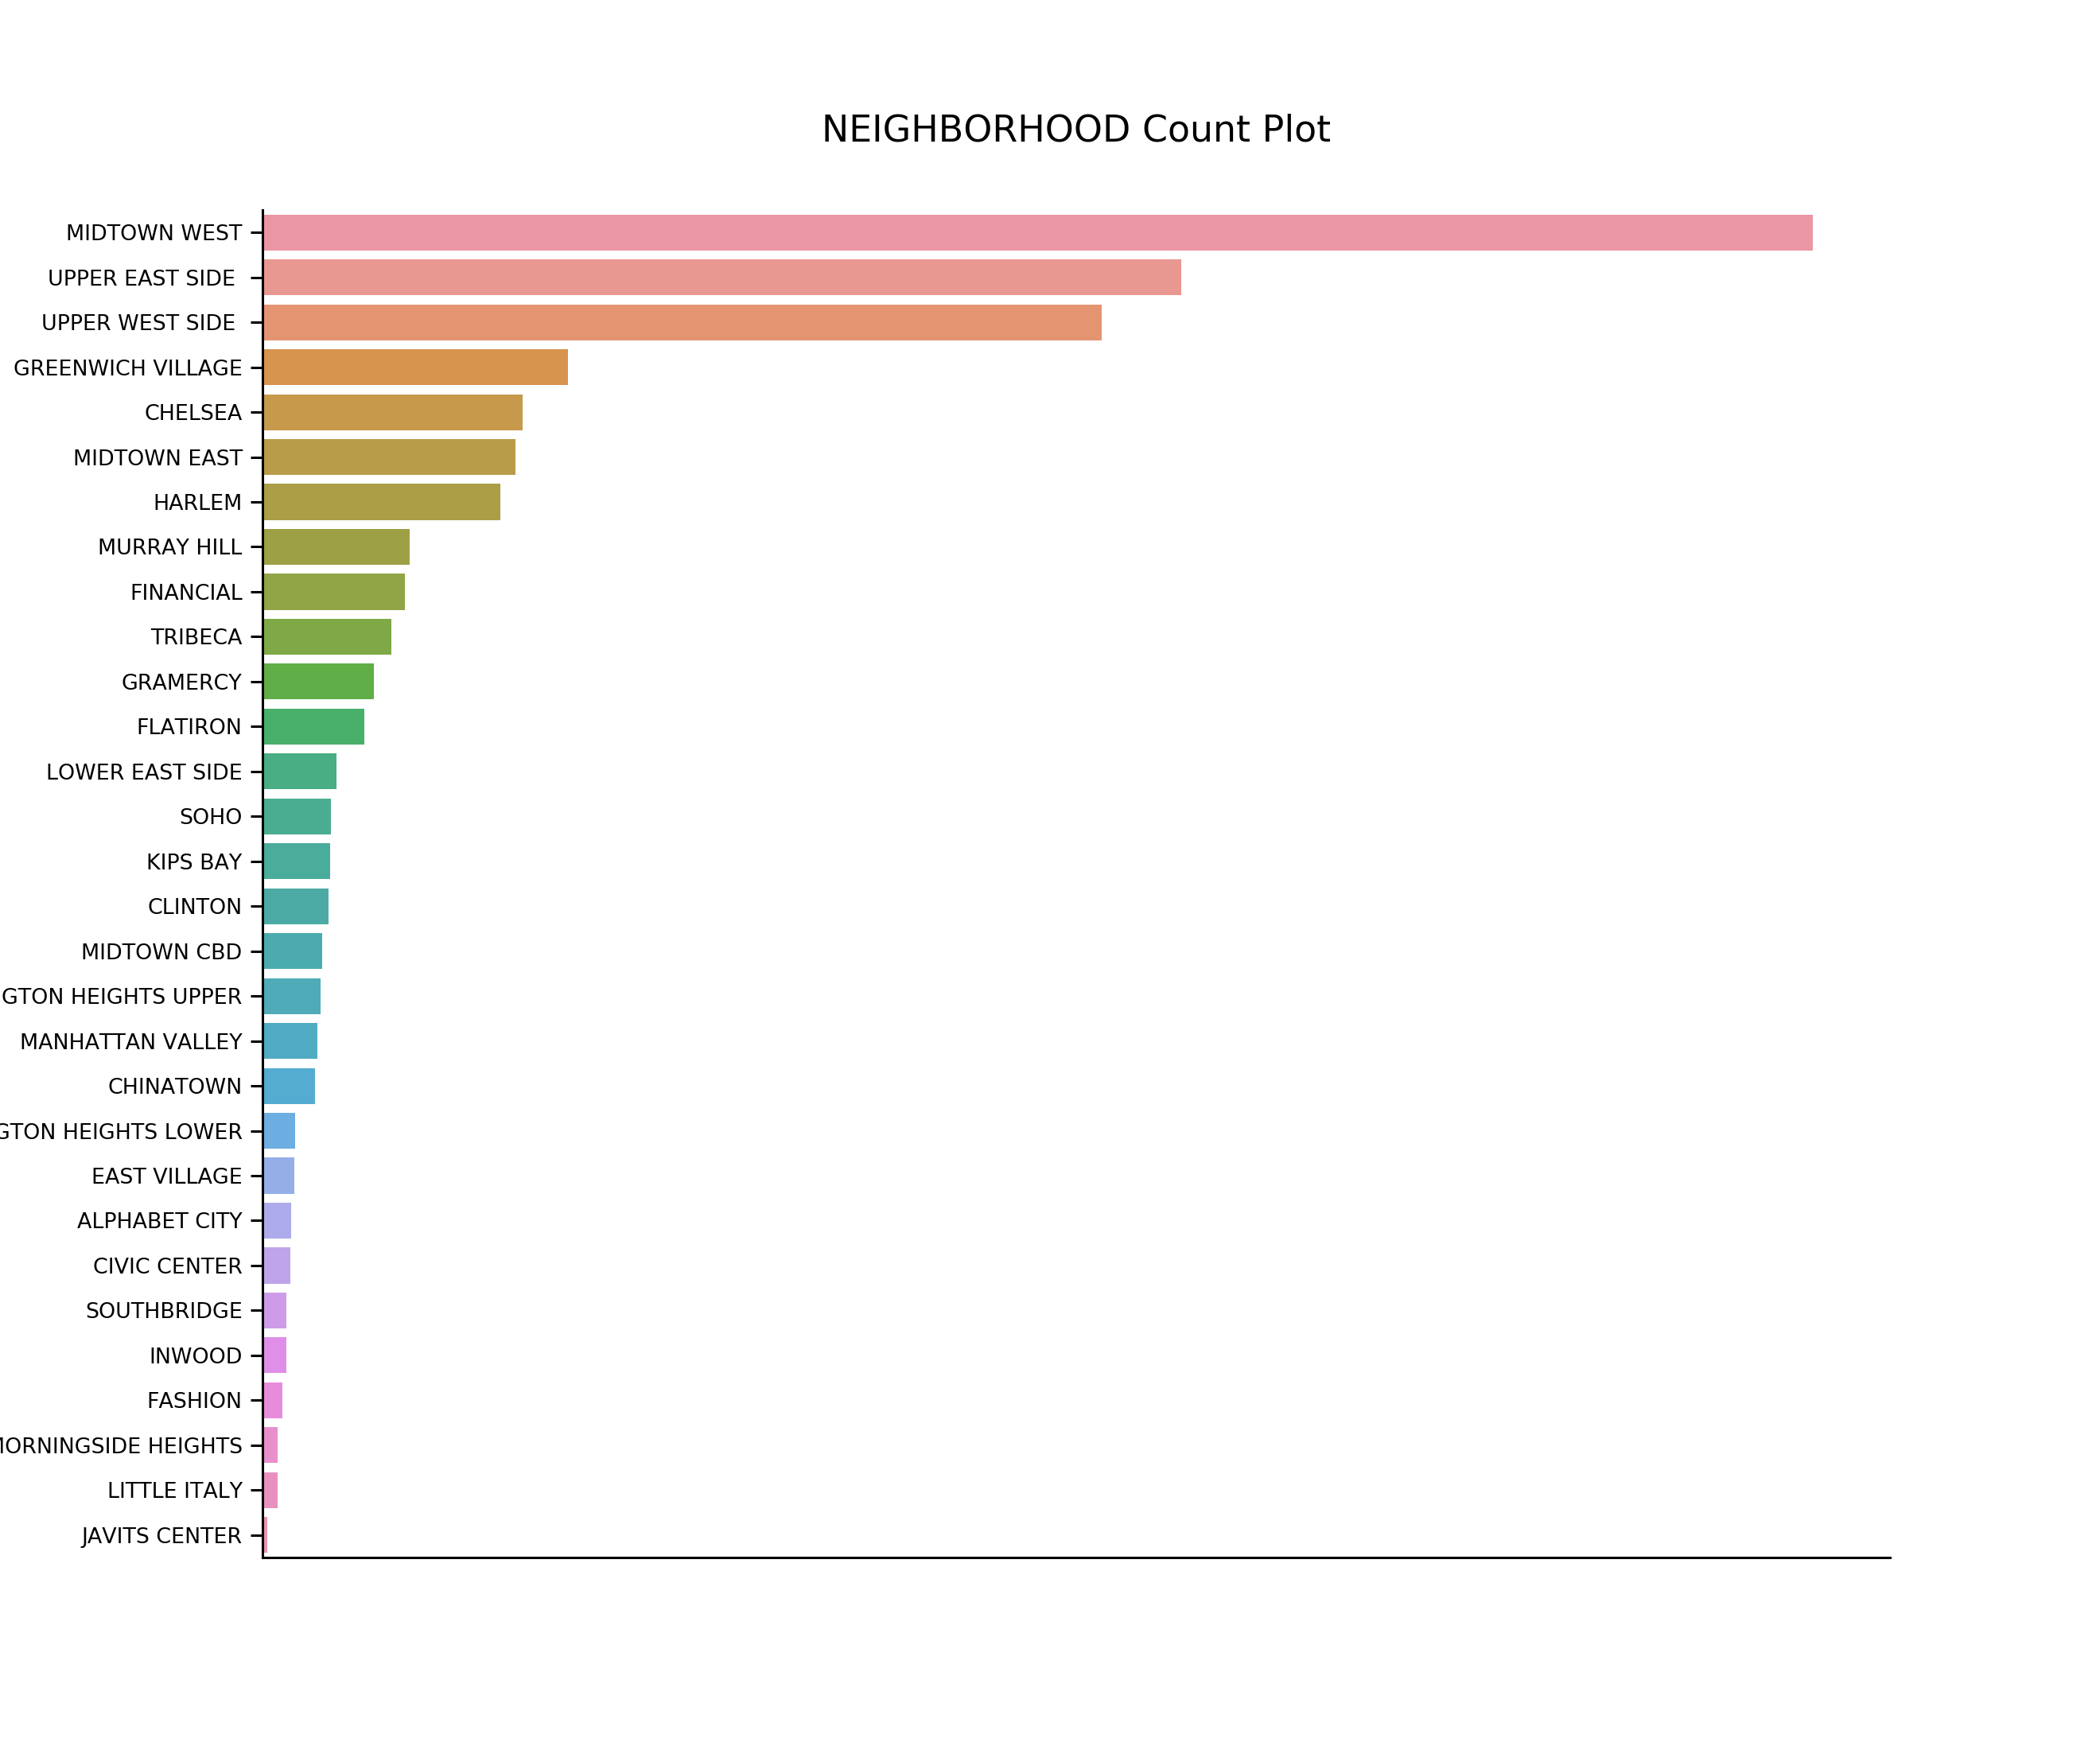

In [884]:
# Base setting
sns.set_palette("RdBu_r",6)
sns.set_context("paper")

plt.figure(figsize = (12,10))
counts = housing['NEIGHBORHOOD'].value_counts()
sns.barplot(counts.values,counts.index)
plt.xticks([])
plt.title('NEIGHBORHOOD Count Plot',y = 1.04,fontsize = 15)
sns.despine(right=True)


<IPython.core.display.Javascript object>


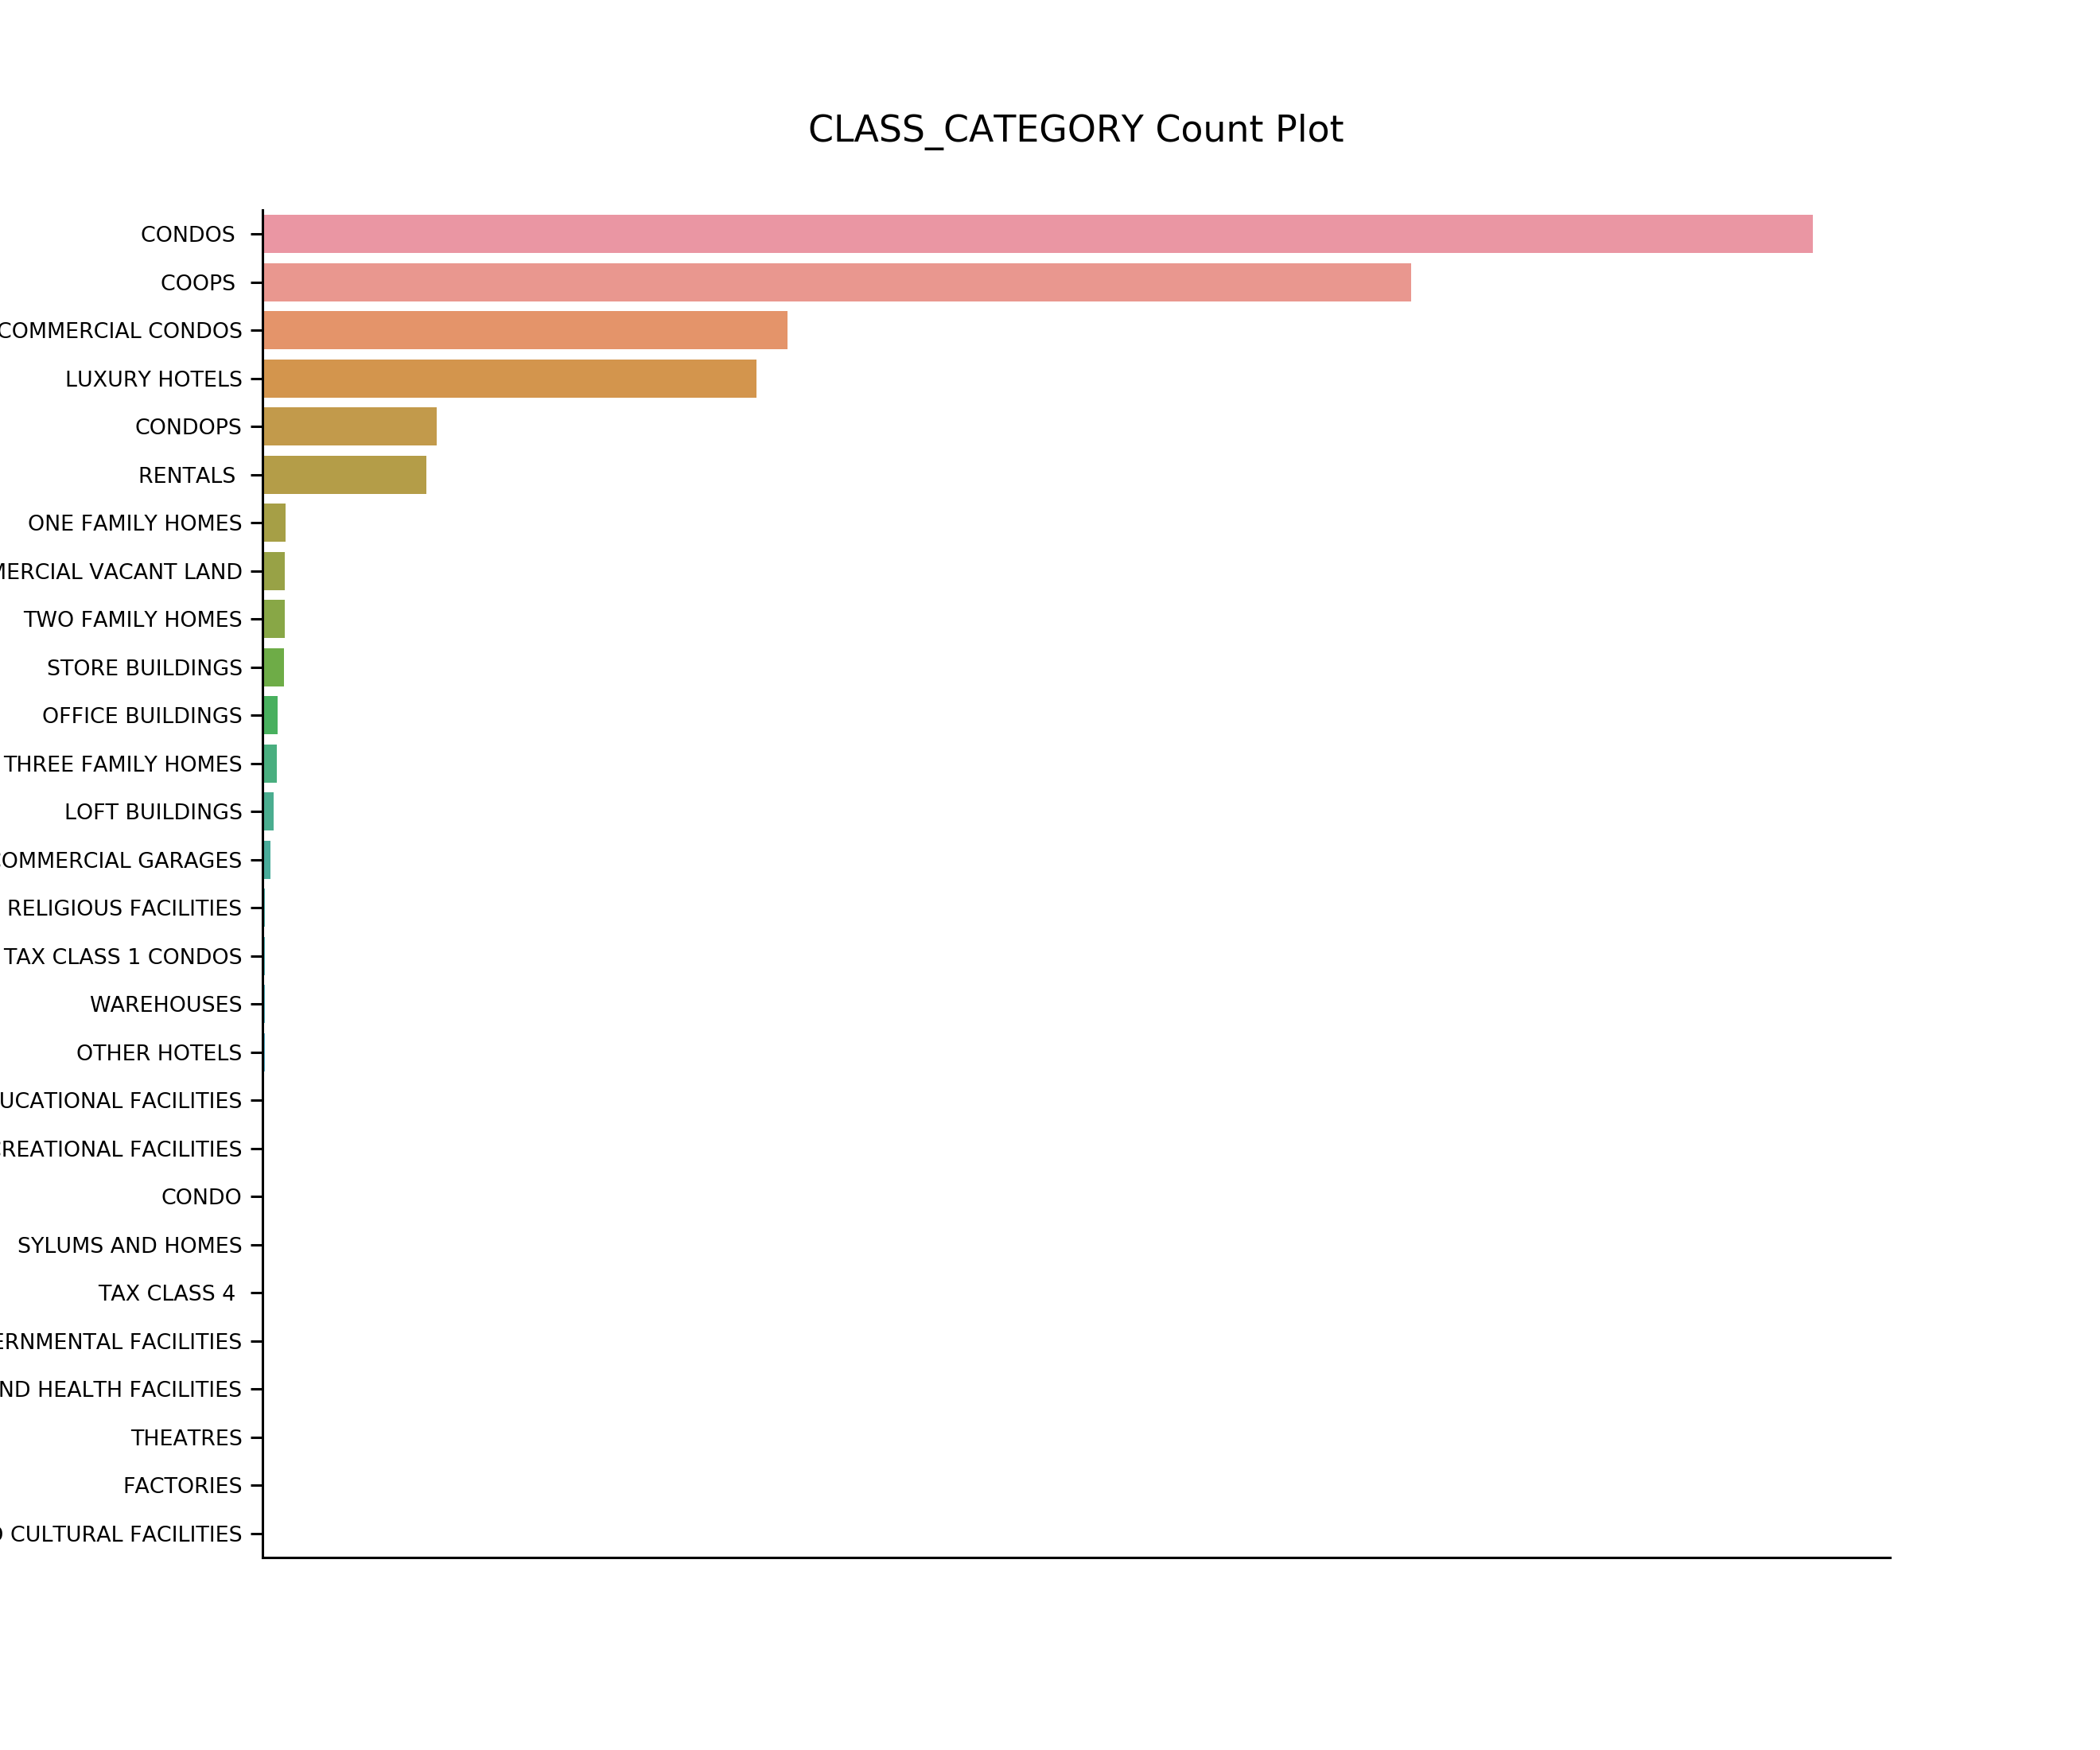

In [853]:
plt.figure(figsize = (12,10))

counts = housing['CLASS_CATEGORY'].value_counts()
sns.barplot(counts.values,counts.index)
plt.xticks([])
plt.title('CLASS_CATEGORY Count Plot',y = 1.04,fontsize = 15)
sns.despine(right=True)

<IPython.core.display.Javascript object>


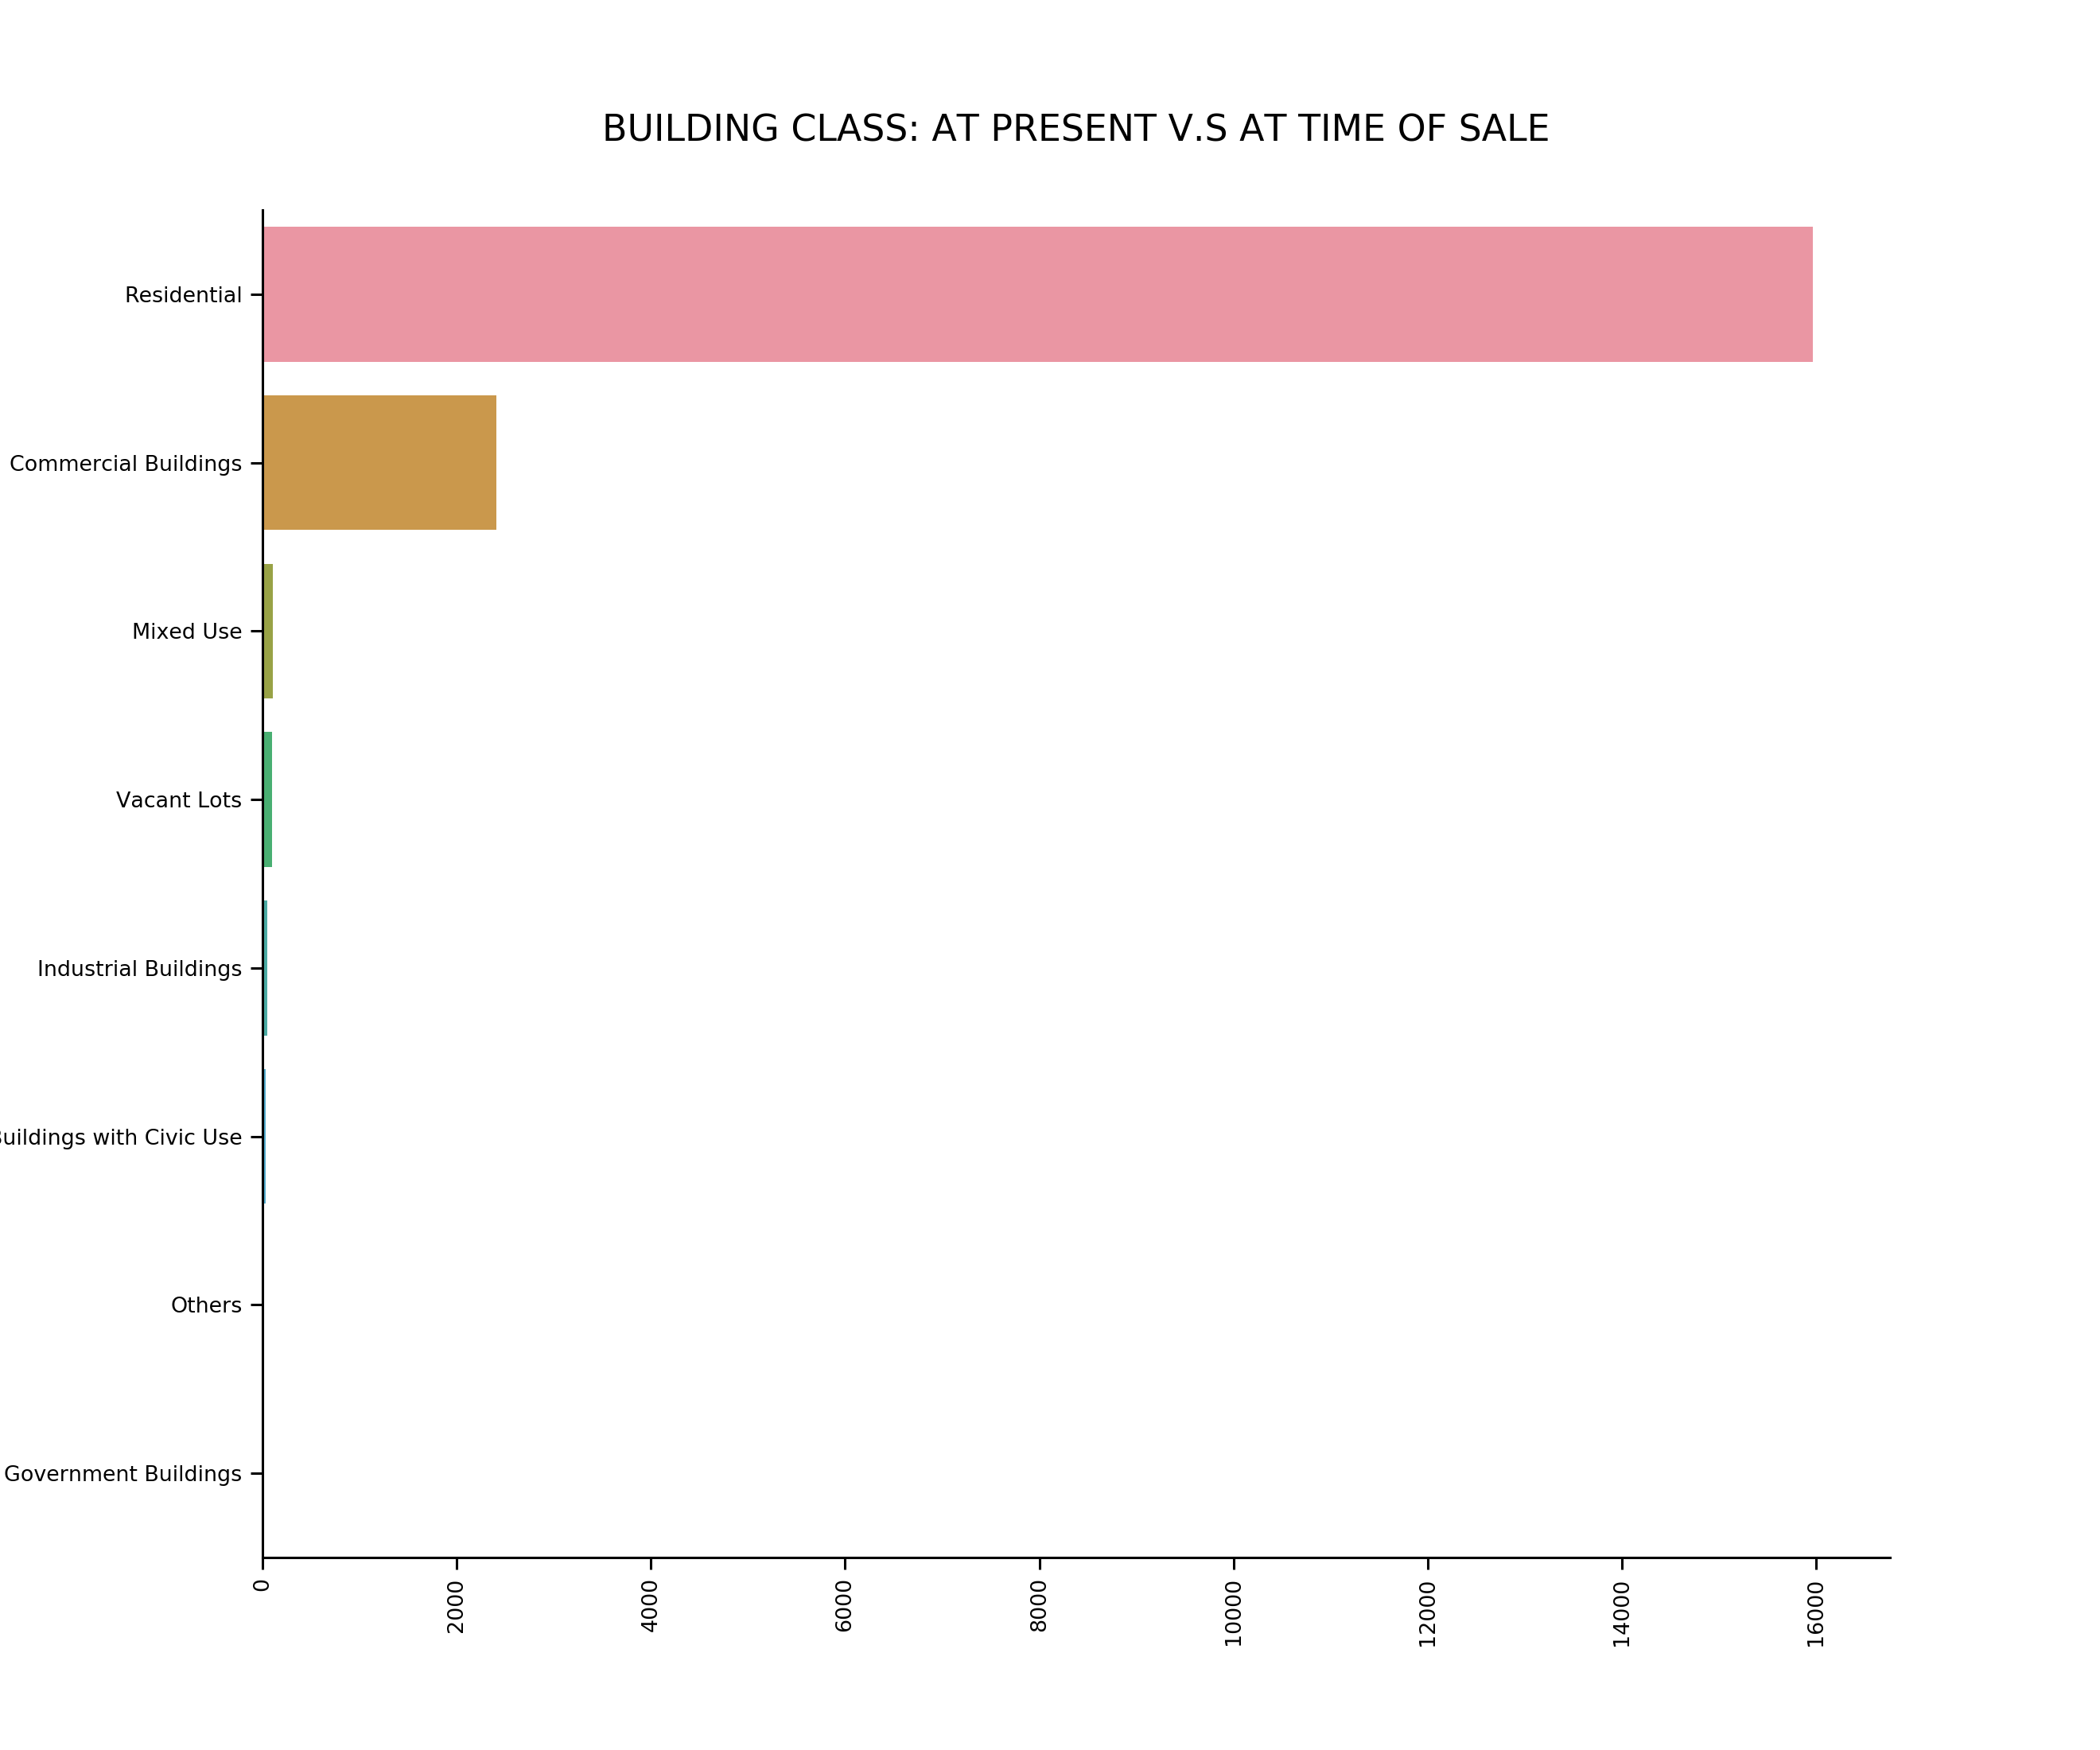

In [892]:
fig, ax = plt.subplots(figsize = (12,10))

counts1 = housing['BUILDING CLASS AT PRESENT'].value_counts()
counts2 = housing['BUILDING CLASS AT TIME OF SALE'].value_counts()

sns.barplot(counts1.values,counts1.index,ax = ax)
sns.barplot(counts2.values,counts2.index,ax = ax)

plt.xticks(rotation = 90)
plt.title('BUILDING CLASS: AT PRESENT V.S AT TIME OF SALE',y = 1.04,fontsize = 15)
sns.despine(right=True)

<IPython.core.display.Javascript object>


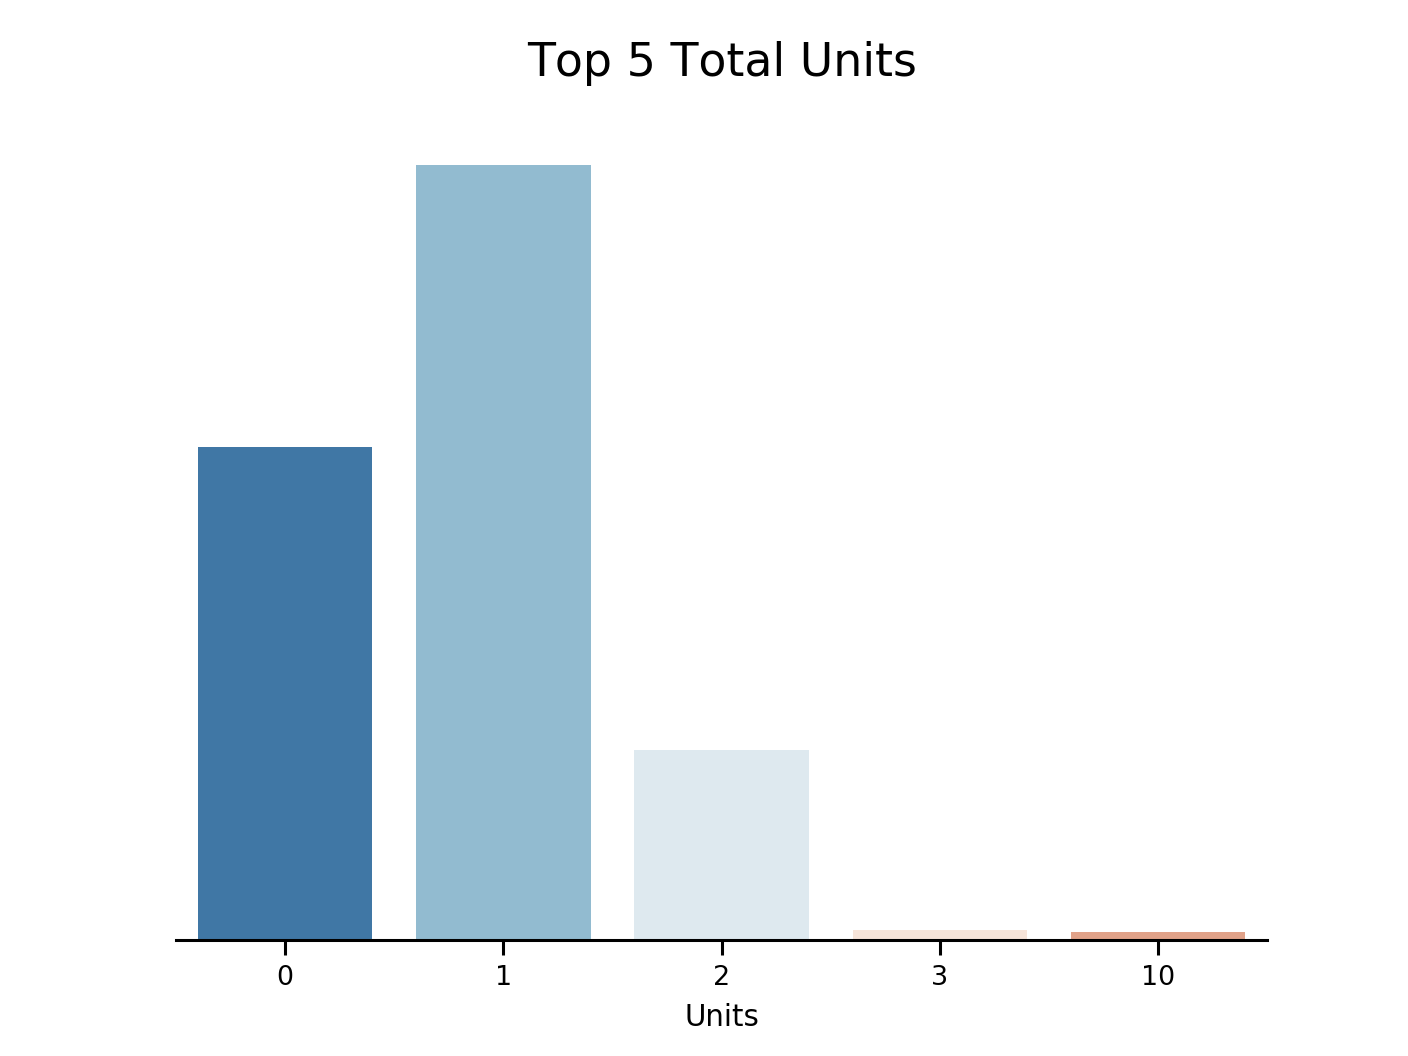

In [887]:
plt.figure()
top5_counts = housing['TOTAL UNITS'].value_counts().head()
sns.barplot(top5_counts.index,top5_counts)
plt.title('Top 5 Total Units',y = 1.04,fontsize = 15)
plt.ylabel('')
plt.xlabel('Units')
plt.yticks([])
sns.despine(left=True)


<IPython.core.display.Javascript object>


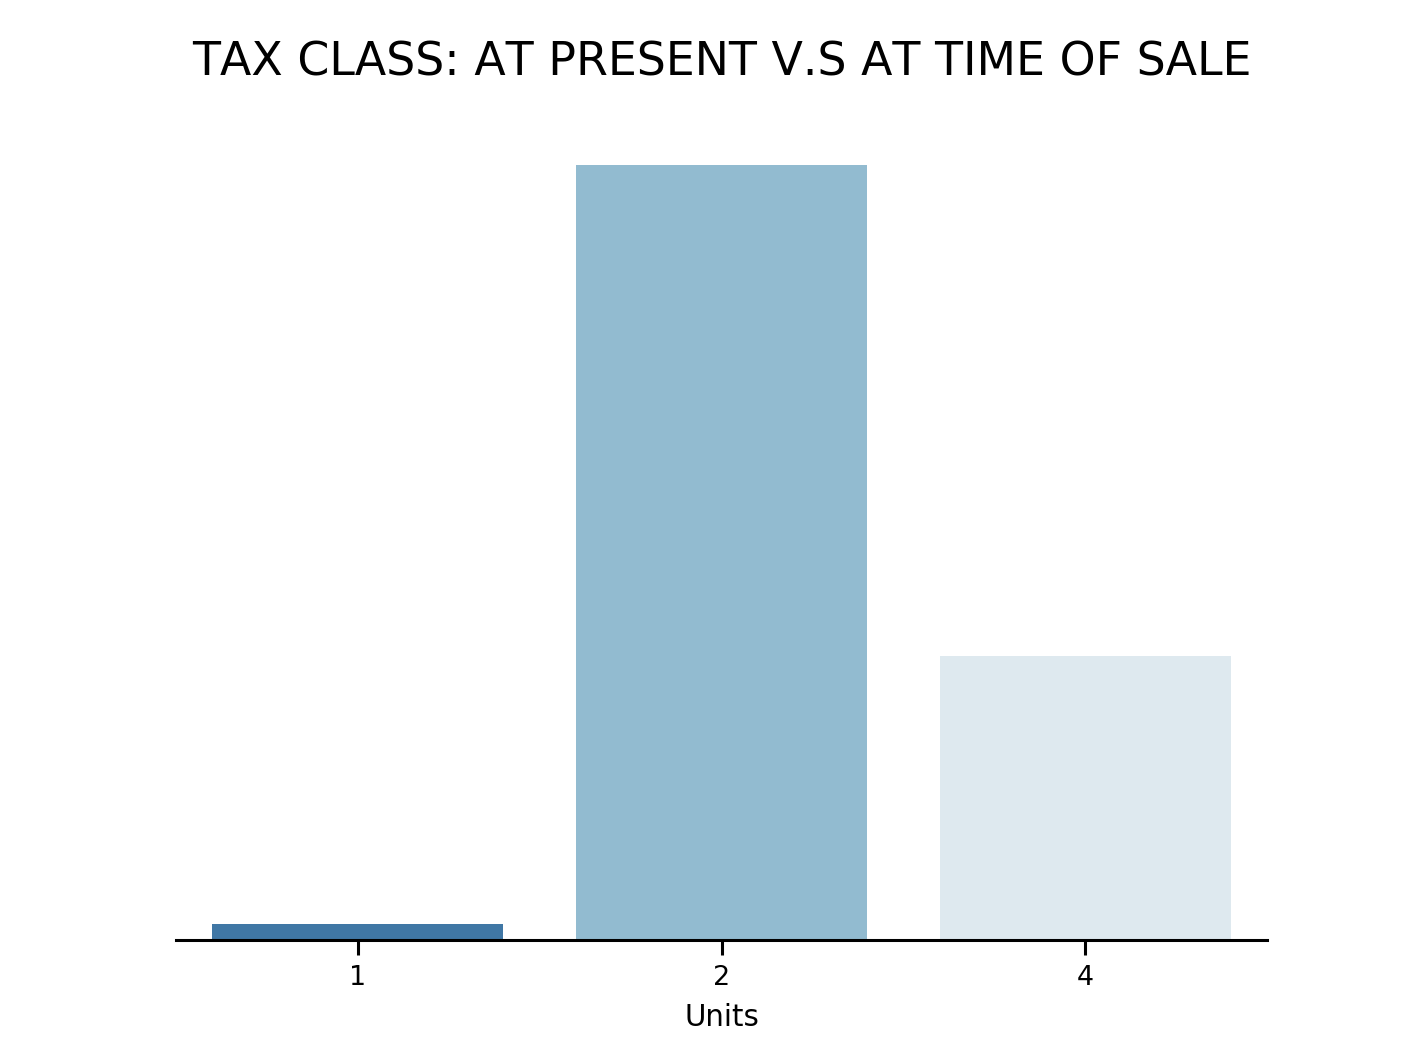

In [886]:
fig, ax = plt.subplots()
sns.countplot('TAX CLASS AT PRESENT',data = housing,ax = ax)
sns.countplot('TAX CLASS AT TIME OF SALE',data = housing,ax = ax)
plt.title('TAX CLASS: AT PRESENT V.S AT TIME OF SALE',y = 1.04,fontsize = 15)
plt.ylabel('')
plt.xlabel('Units')
plt.yticks([])
sns.despine(left=True)

<IPython.core.display.Javascript object>


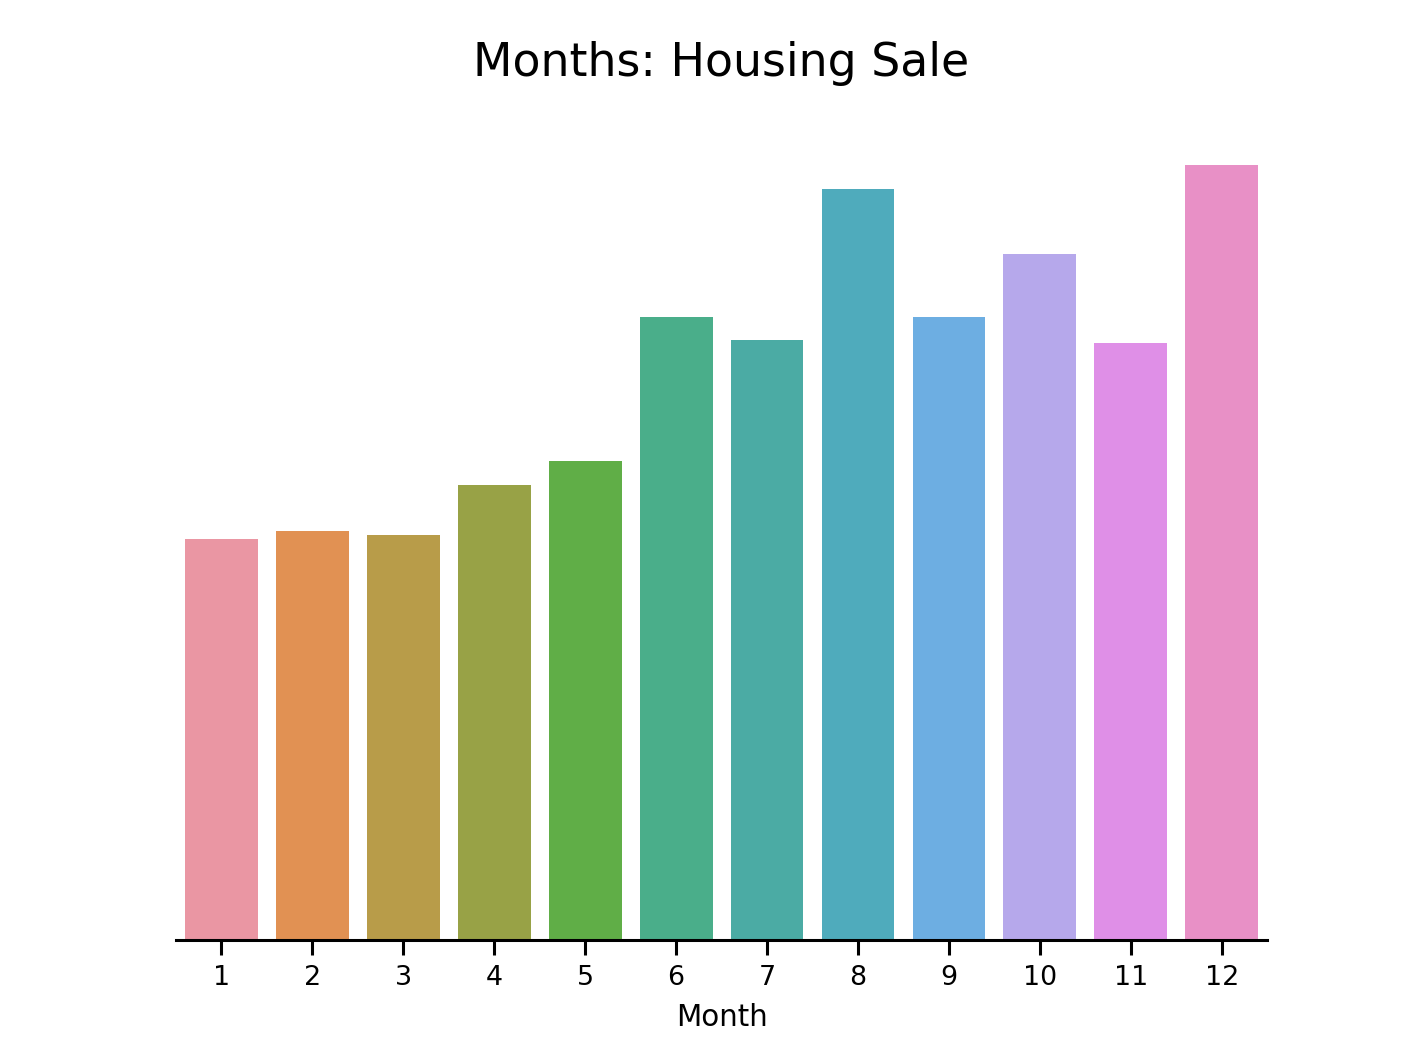

In [902]:
plt.figure()
sns.countplot('SALE DATE-month',data = housing)
plt.title('Months: Housing Sale',y = 1.04,fontsize = 15)
plt.ylabel('')
plt.xlabel('Month')
plt.yticks([])
sns.despine(left=True)

<IPython.core.display.Javascript object>


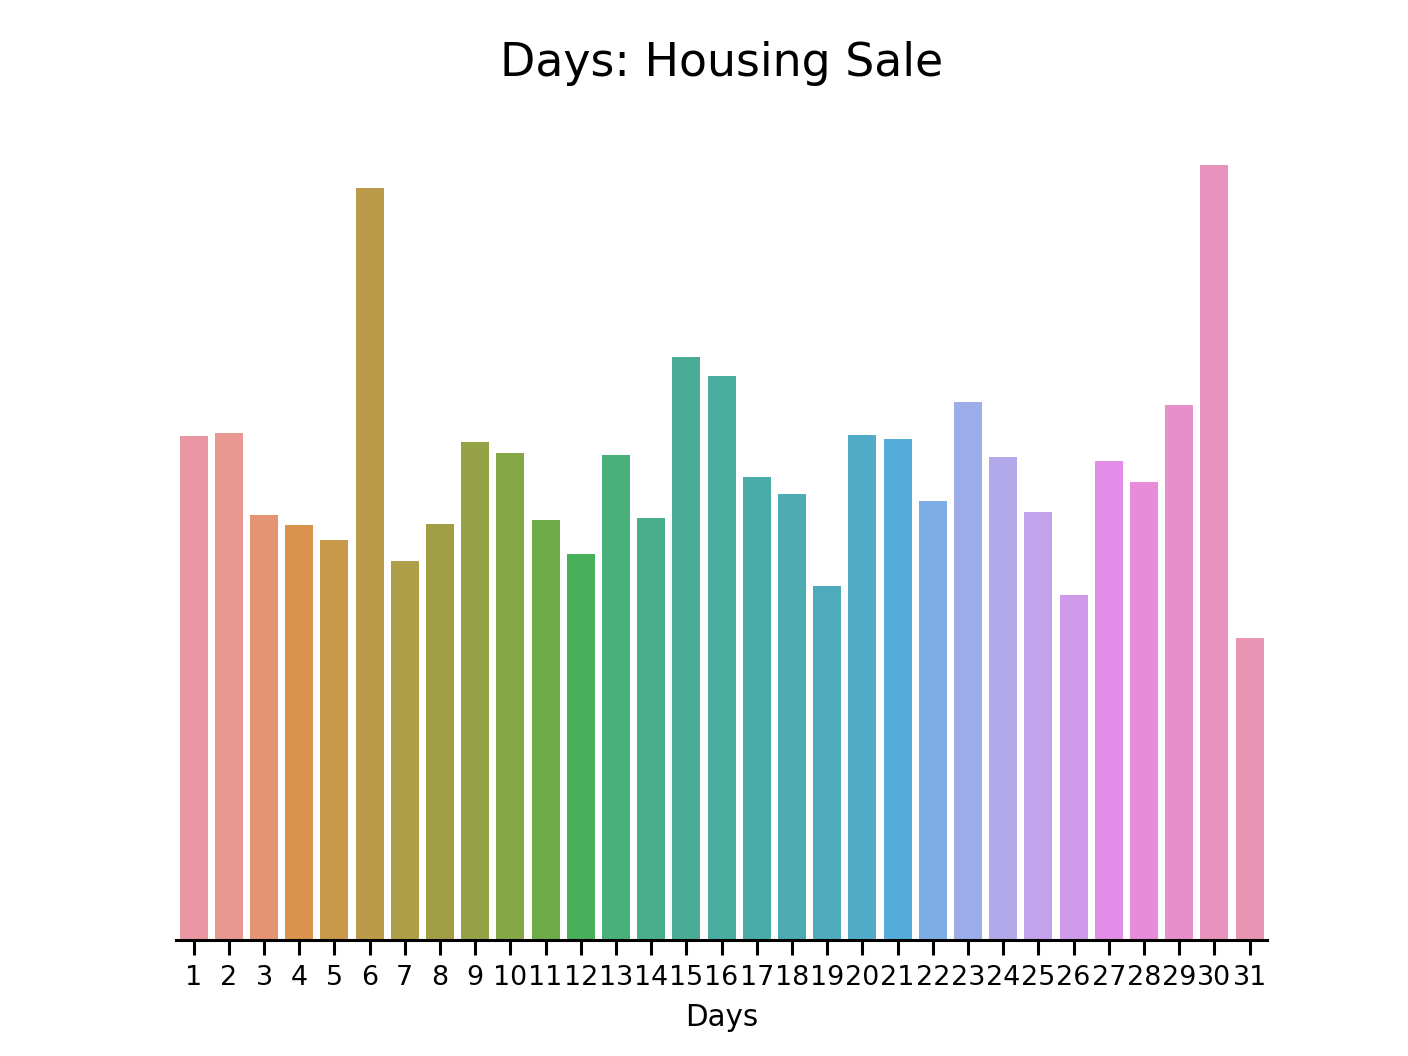

In [901]:
plt.figure()
sns.countplot('SALE DATE-day',data = housing)
plt.title('Days: Housing Sale',y = 1.04,fontsize = 15)
plt.ylabel('')
plt.xlabel('Days')
plt.yticks([])
sns.despine(left=True)

In [917]:
# import datetime

# fig, ax = plt.subplots(figsize = (8,8))
# sns.scatterplot(housing['SALE DATE'],housing['SALE PRICE'],ax = ax)
# ax.set_xlim([datetime.date(2009, 1, 1), datetime.date(2009, 12, 31)])

# # most are 0

# Step 4: Output CSV

In [919]:
housing.to_csv('housing_cleaned.csv', index = False)